# KPIs

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## 1. Quantidade de pedidos mensal, trimestral e anual

In [2]:
orders = pd.read_csv("../datasets/trusted/delivered_orders.csv")
orders.count()

Unnamed: 0                       91701
order_id                         91701
customer_id                      91701
order_approved_at                91688
order_purchase_timestamp         91701
order_estimated_delivery_date    91701
order_delivered_carrier_date     91701
order_delivered_customer_date    91701
dtype: int64

In [3]:
purchase_time = pd.to_datetime(orders['order_purchase_timestamp'])

orders_by_year_and_month = pd.DataFrame({
        'id': orders['order_id'],
        'year': purchase_time.dt.year,
        'month': purchase_time.dt.month
})

count_by_month = orders_by_year_and_month.groupby(['year', 'month']).agg(['count'])
count_by_month

id
           count
year month      
2017 1       721
     2      1559
     3      2413
     4      2166
     5      3358
     6      2999
     7      3737
     8      4005
     9      3943
     10     4265
     11     6972
     12     5246
2018 1      6699
     2      6299
     3      6641
     4      6479
     5      6460
     6      5794
     7      5853
     8      6092

### Mensal

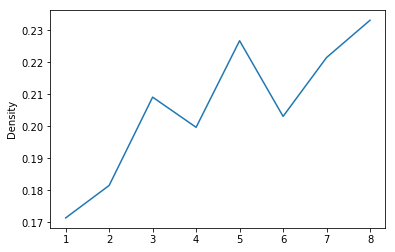

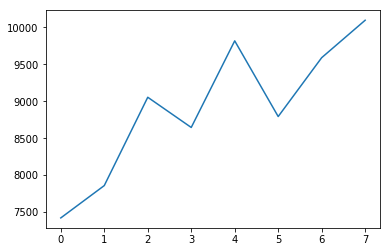

In [4]:
orders_by_year_and_month['month'][orders_by_year_and_month['month'] <= 8].plot.kde(ind=list(range(1, 9)))
plt.show()

plt.plot(count_by_month.values[:8] + count_by_month.values[12:])
plt.plot()
plt.show()

### Trimestral

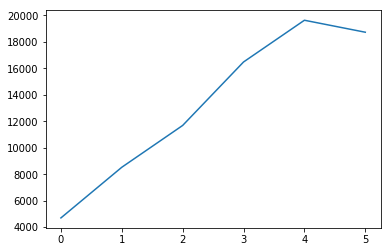

In [5]:
def trimester(year, n):
    first_month = 3 * n + 1
    return count_by_month.T[year][[first_month, first_month + 1, first_month + 2]].T.sum()

years = count_by_month.index.levels[0]
trimesters = []
for y in years:
    try:
        for i in range(4):
            trimesters.append(trimester(y, i))
    except KeyError:
        pass

plt.plot(trimesters)

### Anual

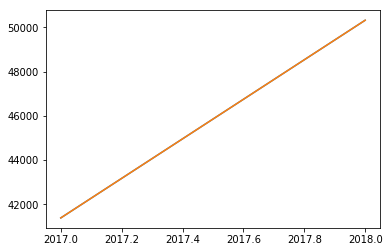

In [6]:
by_year = orders_by_year_and_month.groupby(['year']).agg(['count'])
plt.plot(by_year)

## 2. Média de valor dos pedidos

In [7]:
sold = pd.read_csv('../datasets/trusted/sold_products.csv')
sold.head()

,Unnamed: 0,product_id,order_id,price,freight_value,order_purchase_timestamp,order_estimated_delivery_date,order_delivered_carrier_date,order_delivered_customer_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,4244733e06e7ecb4970a6e2683c13e61,00010242fe8c5a6d1ba2dd792cb16214,58.9,13.29,2017-09-13 08:59:02,2017-09-29 00:00:00,2017-09-19 18:34:16,2017-09-20 23:43:48,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,1,4244733e06e7ecb4970a6e2683c13e61,130898c0987d1801452a8ed92a670612,55.9,17.96,2017-06-28 11:52:20,2017-07-26 00:00:00,2017-07-05 12:00:33,2017-07-13 20:39:29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,2,4244733e06e7ecb4970a6e2683c13e61,532ed5e14e24ae1f0d735b91524b98b9,64.9,18.33,2018-05-18 10:25:53,2018-06-07 00:00:00,2018-05-23 14:05:00,2018-06-04 18:34:26,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,3,4244733e06e7ecb4970a6e2683c13e61,6f8c31653edb8c83e1a739408b5ff750,58.9,16.17,2017-08-01 18:38:42,2017-08-25 00:00:00,2017-08-02 19:07:36,2017-08-09 21:26:33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,4,4244733e06e7ecb4970a6e2683c13e61,7d19f4ef4d04461989632411b7e588b9,58.9,13.29,2017-08-10 21:48:40,2017-09-01 00:00:00,2017-08-11 19:43:07,2017-08-24 20:04:21,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0


In [8]:
sold['price'].mean()

99.57903071099628

In [9]:
sold['price'].std()

92.90721493542998

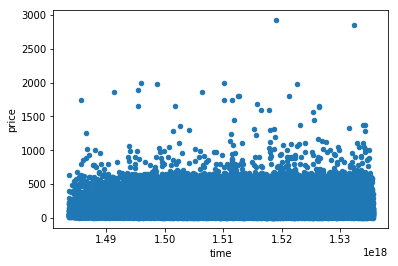

In [10]:
purchases = sold[['order_id', 'price']].groupby(['order_id']).agg(['sum'])

orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

order_price_by_year_and_month = pd.DataFrame({
        'price': purchases['price']['sum'].values,
        'time': pd.to_numeric(orders['order_purchase_timestamp']),
        'year': orders['order_purchase_timestamp'].dt.year.values,
        'month': orders['order_purchase_timestamp'].dt.month.values
})
order_price_by_year_and_month.head()

order_price_by_year_and_month.plot.scatter(x='time', y='price')

In [11]:
sold['order_purchase_timestamp'] = pd.to_datetime(sold['order_purchase_timestamp'])
sold = sold.sort_values('order_purchase_timestamp')

item_price_by_year_and_month = pd.DataFrame({
        'price': sold['price'],
        'year': sold['order_purchase_timestamp'].dt.year,
        'month': sold['order_purchase_timestamp'].dt.month
})
item_price_by_year_and_month.head()

,price,year,month
71800,10.9,2017,1
98457,10.9,2017,1
73432,2.9,2017,1
89731,7.9,2017,1
86843,9.9,2017,1


In [12]:
order_price_by_year_and_month = order_price_by_year_and_month[['price', 'year', 'month']]
order_price_by_month = order_price_by_year_and_month.groupby(['year', 'month']).agg(['mean', 'std'])
order_price_by_month

price            
                  mean         std
year month                        
2017 1      116.131304  122.869449
     2      114.993823  114.686122
     3      112.853365  102.674069
     4      114.190300  109.571437
     5      113.442007  118.733988
     6      112.846736  110.865787
     7      113.491897  110.937229
     8      116.001111  114.575000
     9      112.441542  109.201045
     10     113.704891  105.492157
     11     115.499974  117.091260
     12     114.208090  112.153943
2018 1      113.099610  109.998333
     2      114.311429  116.063624
     3      116.356853  114.785584
     4      113.046686  109.601818
     5      114.382590  114.862397
     6      113.759888  109.928465
     7      112.922650  114.598109
     8      111.405433  108.469627

In [13]:
item_price_by_month = item_price_by_year_and_month.groupby(['year', 'month']).agg(['mean', 'std'])
item_price_by_month

price            
                  mean         std
year month                        
2017 1      101.302940  107.044364
     2      100.291629   95.995744
     3       99.443567   97.183070
     4      103.682887   96.755307
     5       99.585196   92.610865
     6       98.977654   93.525190
     7       97.128738   84.812182
     8       97.714929   92.922030
     9      102.727948   94.223676
     10     100.411820   95.277876
     11      98.793848   93.884458
     12     101.966138   94.500576
2018 1       98.752008   89.821866
     2       96.774161   90.603175
     3      100.707942   95.824431
     4      101.335732   93.581481
     5      100.916683   92.958326
     6       98.380160   90.903848
     7      100.779281   94.441712
     8       96.303461   88.371304

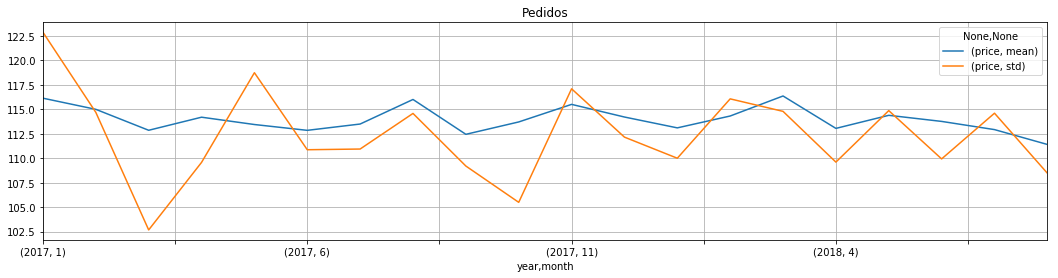

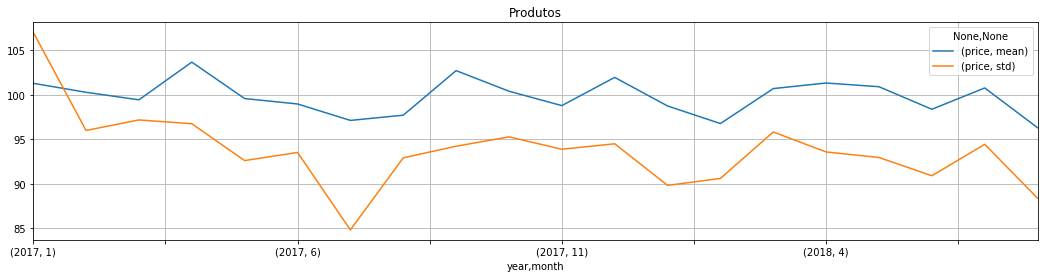

In [14]:
plt.rcParams['figure.figsize'] = (18, 4)

order_price_by_month.plot.line(title="Pedidos", grid=True)
item_price_by_month.plot.line(title="Produtos", grid=True)